In [19]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as npr

In [3]:
chr22_full = pd.read_csv("chr22_chewed.txt",sep=None,engine = 'python')

In [75]:
chr22_sampled = chr22_full.sample(frac=0.01)
chr22_sampled.head(5)

,chromosome,position,original,variant,original_count,variant_count,alt_variant_count
599311,22,36405231,C,T,2495,9,0
432071,22,30955321,C,T,228,1002,1274
1097677,22,51050595,G,A,2450,50,4
1002291,22,48638809,T,C,1873,549,82
792162,22,42787101,T,A,1937,521,46


In [76]:
chr22_sampled.describe()

,chromosome,position,original_count,variant_count,alt_variant_count
count,11035,11035.000000,11035.000000,11035.000000,11035.000000
mean,22,34494110.840326,2370.588854,85.476303,47.934844
std,0,10255130.102729,420.335601,238.063849,233.730952
min,22,16053387.000000,0.000000,0.000000,0.000000
25%,22,25483126.000000,2486.000000,1.000000,0.000000
50%,22,34783763.000000,2502.000000,2.000000,0.000000
75%,22,43751423.000000,2503.000000,17.000000,0.000000
max,22,51234262.000000,2504.000000,1778.000000,2504.000000


In [88]:
def variant_proportion(row):
    try:
        total_count = float(row['original_count'] + row['variant_count'] + row['alt_variant_count'])
        proportion = float(row['variant_count'])/total_count
    except:
        proportion = float(0.0)
    return proportion

def alt_variant_proportion(row):
    try:
        total_count = float(row['original_count'] + row['variant_count'] + row['alt_variant_count'])
        proportion = float(row['alt_variant_count'])/total_count
    except:
        proportion = float(0.0)
    return proportion

def total_variant_proportion(row):
    try:
        total_count = float(row['original_count'] + row['variant_count'] + row['alt_variant_count'])
        total_variants = float(row['variant_count']+row['alt_variant_count'])
        proportion = total_variants/total_count
    except:
        proportion = float(0.0)
    return proportion

In [89]:
## Adding new columns that include variant proportion and alternate variant proportion

variant_prop = chr22_sampled.apply(variant_proportion,axis=1)
alt_variant_prop = chr22_sampled.apply(alt_variant_proportion,axis=1)
total_variant_prop = chr22_sampled.apply(total_variant_proportion,axis=1)
pd.options.mode.chained_assignment = None ## need this or else you get a warning
chr22_sampled['variant_prop'] = variant_prop
chr22_sampled['alt_variant_prop'] = alt_variant_prop
chr22_sampled['total_variant_prop'] = total_variant_prop
chr22_sampled.head(5)

,chromosome,position,original,variant,original_count,variant_count,alt_variant_count,variant_prop,alt_variant_prop,total_variant_prop
599311,22,36405231,C,T,2495,9,0,0.003594,0.000000,0.003594
432071,22,30955321,C,T,228,1002,1274,0.400160,0.508786,0.908946
1097677,22,51050595,G,A,2450,50,4,0.019968,0.001597,0.021565
1002291,22,48638809,T,C,1873,549,82,0.219249,0.032748,0.251997
792162,22,42787101,T,A,1937,521,46,0.208067,0.018371,0.226438


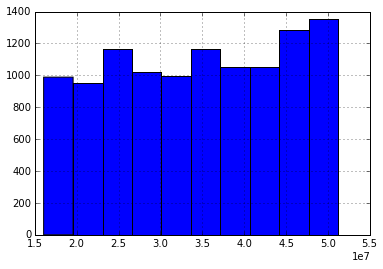

In [90]:
chr22_sampled['position'].hist()

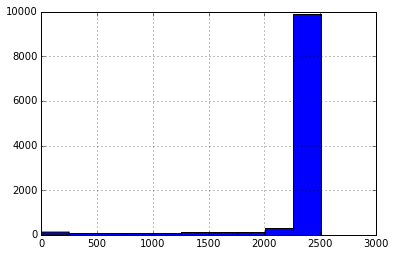

In [91]:
chr22_sampled['original_count'].hist()

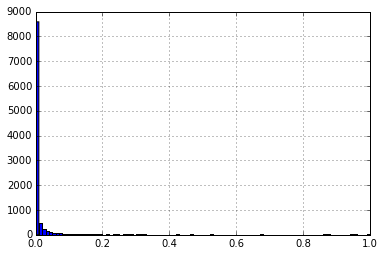

In [96]:
chr22_sampled['total_variant_prop'].hist(bins = 100)

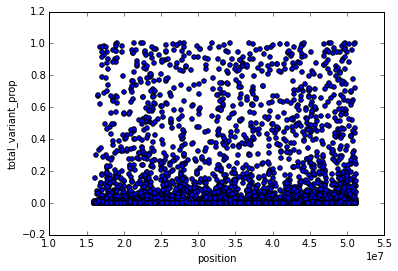

In [94]:
chr22_sampled.plot(kind='scatter', x='position', y='total_variant_prop');